In [1]:
# Install the Dependencies
%pip install opencv-python matplotlib torch kornia


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import kornia as K
import pathlib
from kornia.contrib import FaceDetector, FaceDetectorResult

In [3]:
# Get the Image File
BASE_DIR = pathlib.Path().resolve(strict=True).parent
IMAGE_DIR = BASE_DIR / "images"
IMAGE_FILE = IMAGE_DIR / "image.jpg"

In [4]:
# Select the Device and Type
device = torch.device('cpu')  # use 'cuda:0'
dtype = torch.float32

In [5]:
# Load the Image and Scale (if needed)
img_raw = cv2.imread(str(IMAGE_FILE), cv2.IMREAD_COLOR)

In [6]:
# Preprocess the Image
img = K.image_to_tensor(img_raw, keepdim=False).to(device, dtype)
img = K.color.bgr_to_rgb(img)
img_vis = K.tensor_to_image(img.byte().clone())

(-0.5, 1199.5, 1199.5, -0.5)

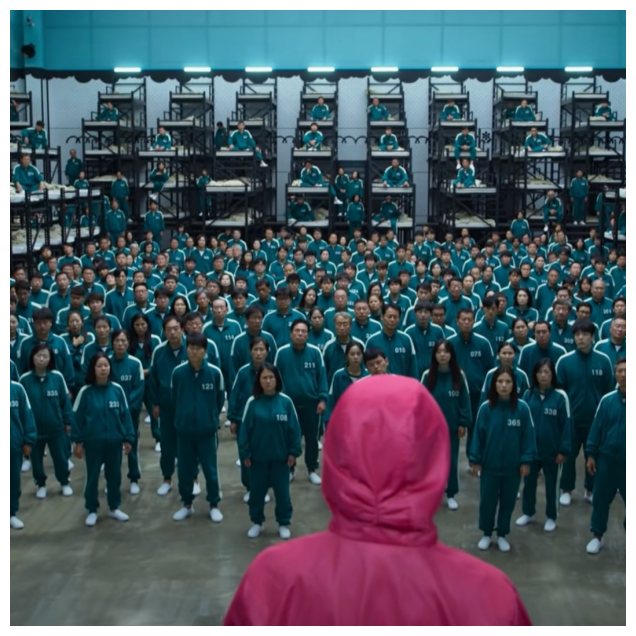

In [7]:
# Show the Image
plt.figure(figsize=(8, 8))
plt.imshow(K.tensor_to_image(img.byte()))
plt.axis('off')

In [9]:
# Face Detection
face_detection = FaceDetector().to(device, dtype)

with torch.no_grad():
    dets = face_detection(img)

# To Decode Later the Detections
dets = [FaceDetectorResult(o) for o in dets]

(-0.5, 1199.5, 1199.5, -0.5)

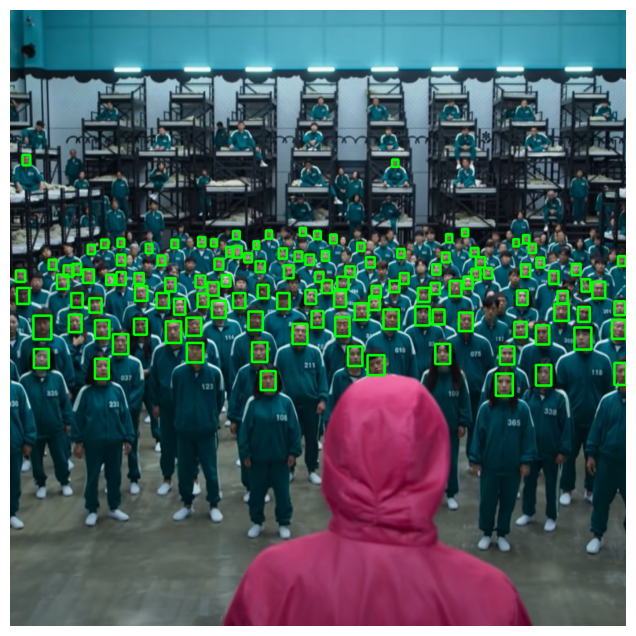

In [10]:
for b in dets:
    if b.score < 0.6:
        continue
    
    # Draw Face Bounding Box around each Detected Face
    x1, y1 = b.top_left.int().tolist()
    x2, y2 = b.bottom_right.int().tolist()
    img_vis = cv2.rectangle(img_vis, (x1, y1), (x2, y2), (0, 255, 0), 4)

plt.figure(figsize=(8, 8))
plt.imshow(img_vis)
plt.axis('off')